In [52]:
import os
from IPython.display import HTML
from IPython.display import display
from graphviz import Source
from IPython.display import SVG
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score
%matplotlib inline

style = "<style>svg{width: 10% !important; height: 10% !important;} </style>"
HTML(style)

os.environ["PATH"] += os.pathsep + \
    "D:\\6DATA_SCIENCE\\Graphviz_for_python\\bin" + \
    os.pathsep + "D:\6DATA_SCIENCE\Graphviz_for_python"

In [53]:
iris = pd.read_csv('train_iris.csv')

iris_test = pd.read_csv('test_iris.csv')

In [54]:
iris = iris.rename(columns={'Unnamed: 0': 'name'})

iris_test = iris_test.rename(columns={'Unnamed: 0': 'name'})

In [55]:
iris

,name,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...,...
95,147,6.5,3.0,5.2,2.0,2
96,124,6.7,3.3,5.7,2.1,2
97,123,6.3,2.7,4.9,1.8,2
98,146,6.3,2.5,5.0,1.9,2


In [56]:
iris_test.head()

,name,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [57]:
X = iris.drop(['species', 'name'], axis=1)
y = iris.species

X_test = iris_test.drop(['species', 'name'], axis=1)
y_test = iris_test.species

In [58]:
np.random.seed(0) 
max_depth_values = range(1,100)

scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X, y)
    train_score = clf.score(X, y)
    test_score = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                              'train_score': [train_score],
                              'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [59]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


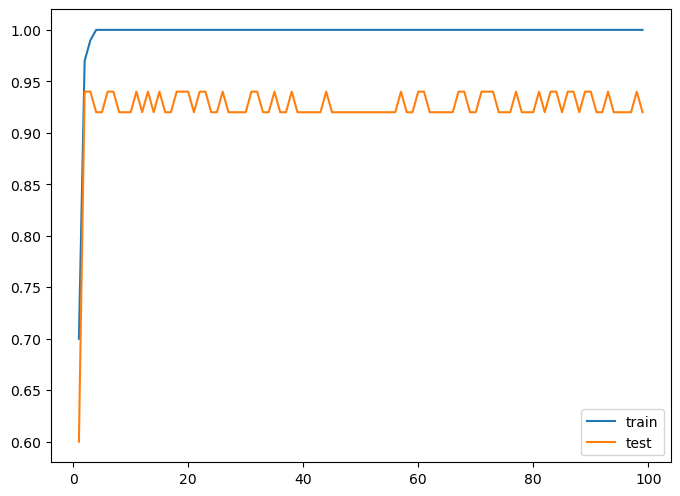

In [61]:
plt.figure(figsize=(8,6), dpi=100)
plt.plot(scores_data.max_depth, scores_data.train_score, label='train')
plt.plot(scores_data.max_depth, scores_data.test_score, label='test')
plt.legend()
plt.show()
